In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 8: K-Means Clustering
In this assignment, you will use K-Means clustering to describe regions of housing value in California. 

**Due Date:  Tuesday Dec. 3rd, 11:59 PM**

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the assignment, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### California housing data

Below we'll read in the california housing dataset. It contains summary statistics for all housing districts across California from a 1990 census. 

In [3]:
cal_housing = pd.read_csv("./data/housing.csv")
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Part 1. Manual creation of clusters

Our initial objective will be to visualize distinct clusters of housing districts that share similar characteristics, such as median house value.  

#### Question 1.1

As always, evaluate the variables of interest before digging into analyses. Visualize the distribution of `median_house_value`.

<Axes: xlabel='median_house_value', ylabel='Count'>

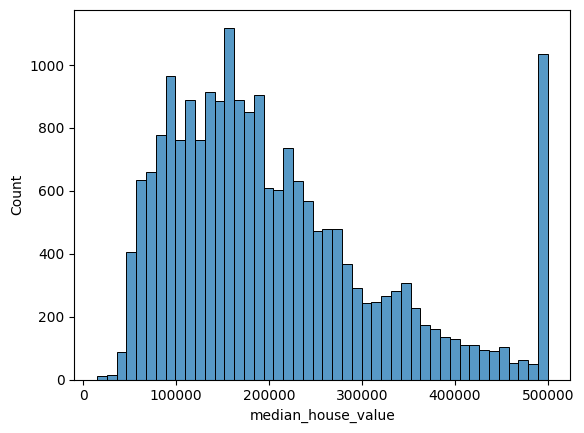

In [4]:
sns.histplot(data = cal_housing, x = "median_house_value")

#### Question 1.2

Do you notice anything anomalous about the distribution? What might this anomaly suggest about how the data was recorded? 

**Your response**: The anomaly would be the gigantic frequency spike in median house value at 500,000. This might suggest that 500,000 is representative of all values greater than 500,000 as well. We can test this by seeing what the max is in the cell right below. As were right that thats what the max is, I'm going to take a wild stab that my original guess was right

In [5]:
np.max(cal_housing["median_house_value"])

500001.0

#### Question 1.3

Based on the distribution, bin the data into 4 housing value groups. Create a new variable in `cal_housing` called `value_category`, which takes on the value 0,1,2, and 3 depending on which bin the median housing value falls into. Ensure that the maximum value is its own category.

In [6]:
500000/3

166666.66666666666

In [7]:
testing = np.repeat(0,len(np.where(cal_housing["median_house_value"] < 500000/3)[0]))
testing1 = np.repeat(1,len(np.where((cal_housing["median_house_value"] >= 500000/3) & (cal_housing["median_house_value"] < 2*500000/3))[0]))
testing2 = np.repeat(2,len(np.where((cal_housing["median_house_value"] >= 2*500000/3) & (cal_housing["median_house_value"] < 500000))[0]))
testing3 = np.repeat(3,len(np.where((cal_housing["median_house_value"] >= 500000))[0]))

value_cat = np.concatenate([testing,testing1,testing2,testing3])
len(value_cat)
#len(cal_housing)

20640

In [8]:
cal_housing["value_category"] = value_cat

In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

#### Question 1.4

Now plot latitude as a function of longitude (such that latitude is on the y-axis), changing the color of points depending on their value category. Be sure to use a sequential color palette to make visualization easier.

Text(0.5, 1.0, 'Median Housing Categories in California by Longitude and Latitude')

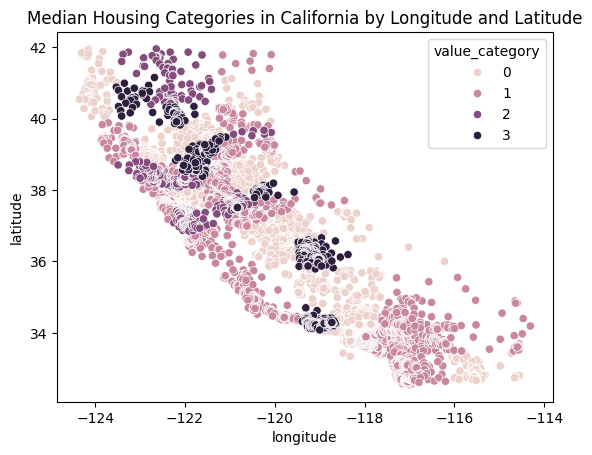

In [20]:
sns.scatterplot(data = cal_housing, x = "longitude", y = "latitude", hue = "value_category") #seaborn defaults to a sequential color pallette
plt.title("Median Housing Categories in California by Longitude and Latitude")

What can you infer about geographic location and expected housing value?

**Your response**: Woah this graph is beautiful and it basically looks like california! We can infer that median house prices being above 500,000 tend to be geographic clustered. Knowing these cities and california, it looks like those cities  represents san diego, LA, maybe Sacramento? idk what would be that far north because that is to my knowledge just farmland. Also another important note is that coastal citis are all in our classification "1" indicating they are more expenseive than the inbetween farmland. 

### Part 2. K-means clustering

#### Question 2.1

Rather than create these value groupings ourselves, which are done in a fairly arbitrary manner, let's use K-Means clustering to automatically generate these clusters ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). When instatiating a model with KMeans, be sure to set `n_clusters` equal to 4 (to replicate our methods above). 

Then plot latitude and longitude again, but now changing the color of points by Cluster instead.

*Note*: K-Means does not intrinsically order its clusters in any quantitative manner. Thus it will likely be misleading to use a quantitative color palette. You should be sure to use a qualitative color palette for your K-Means clusters. 

*Hint*: When fitting the model, you should only fit it on the median housing values.

In [29]:
k_color = sns.color_palette("bright")

In [26]:
from sklearn.cluster import KMeans

value_clusters = KMeans(n_clusters=4).fit(cal_housing[['median_house_value']])

X = cal_housing[["latitude", "longitude", "median_house_value"]]

X["Cluster"] = value_clusters.labels_

X["Cluster"] = X["Cluster"].astype("category")

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\768941404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = value_clusters.labels_
C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\768941404.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\1527752082.py:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(data = X, x = "longitude", y = "latitude", hue = "Cluster", palette = k_color)


Text(0.5, 1.0, 'Median Housing Categories in California by Longitude and Latitude K-Means')

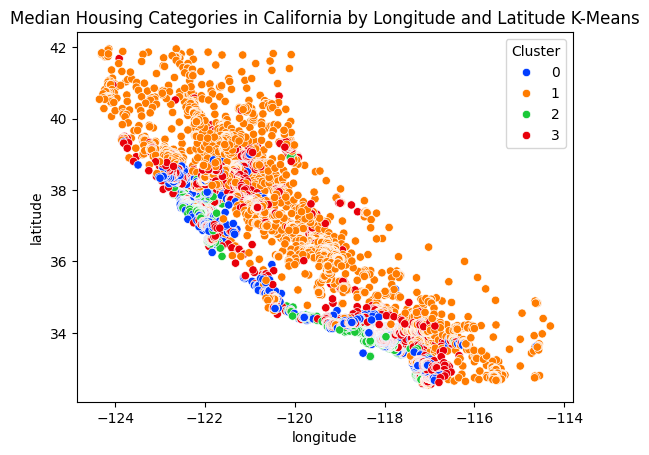

In [34]:
sns.scatterplot(data = X, x = "longitude", y = "latitude", hue = "Cluster", palette = k_color)
plt.title('Median Housing Categories in California by Longitude and Latitude K-Means')

#### Question 2.2

How did the K-Means clustering model perform compared to our plotted categories above (you can visually assess this)? 

**Your response**: Well it definitely captured similar trends to be the same, espeically the one being that coastal property was more expensive and that the middle space of the state was less expensive. It also captured certain regional trends outside of the cost like the gigantic blob of points in the south, same with the the central valley also being a little bit more expensive. 

#### Question 2.3 

Visualize the distribution of `median_house_value` within each cluster. 

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\2001545271.py:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.histplot(data = X, x = "median_house_value", hue = "Cluster", palette = k_color)


Text(0.5, 1.0, 'Histogram of Housing Clusters K-Means')

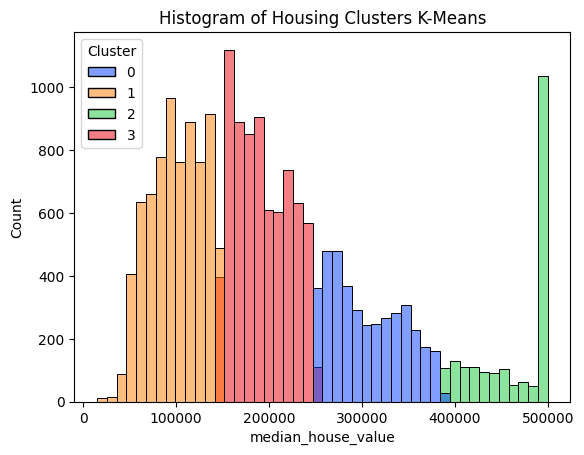

In [35]:
sns.histplot(data = X, x = "median_house_value", hue = "Cluster", palette = k_color)
plt.title("Histogram of Housing Clusters K-Means")

How did the clustering algorithm do at partitioning housing value into 4 distinct clusters?

**Your response**: Damn that's kind of insane how well it did at doing that. It divided it up into 4 clusters, one distinct difference between this and what we did is that it also grouped multiple values into the category that we specifically made for above 500,000. But yes, the clustering algorithim did a good job at partioning the housing values into 4 distinct clusters.

#### Question 2.3

Now we'll read in a dataset of Californian towns/cities and their latitude/longitude. 

In [36]:
cities = pd.read_csv("./data/cal_cities_lat_long.csv")
cities.head()

,Name,Latitude,Longitude
0,Adelanto,34.582769,-117.409214
1,Agoura Hills,34.153339,-118.761675
2,Alameda,37.765206,-122.241636
3,Albany,37.886869,-122.297747
4,Alhambra,34.095286,-118.127014


Plot the locations of cities on the same map of your clusters. Color the marks black and ensure they're small enough that you can roughly see your classifications behind them. 

<Axes: title={'center': 'Median Housing Categories in California by Longitude and Latitude K-Means'}, xlabel='longitude', ylabel='latitude'>

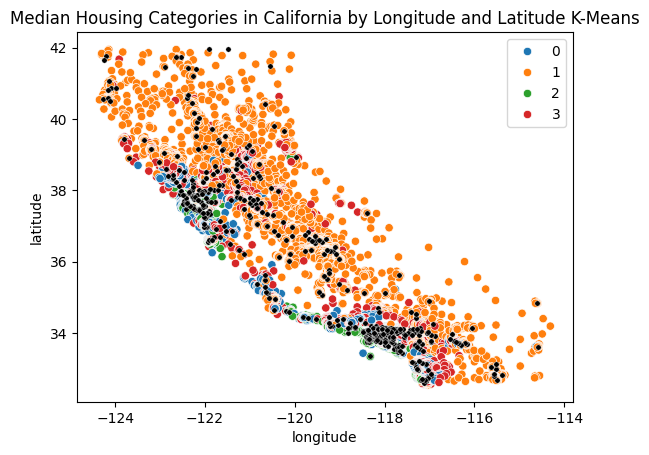

In [48]:
sns.scatterplot(data = X, x = "longitude", y = "latitude", hue = "Cluster", color = k_color)
plt.title('Median Housing Categories in California by Longitude and Latitude K-Means')

sns.scatterplot(data = cities, x = "Longitude", y = "Latitude", color = 'black', s = 15, legend = "auto")

#### Question 2.4

Try out different numbers of clusters with your cities overlain. What is a number of clusters that seems to best describe the locations of towns/cities (or the lack thereof) without over-granularizing housing value?

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\2370978432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = value_clusters.labels_
C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\2370978432.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


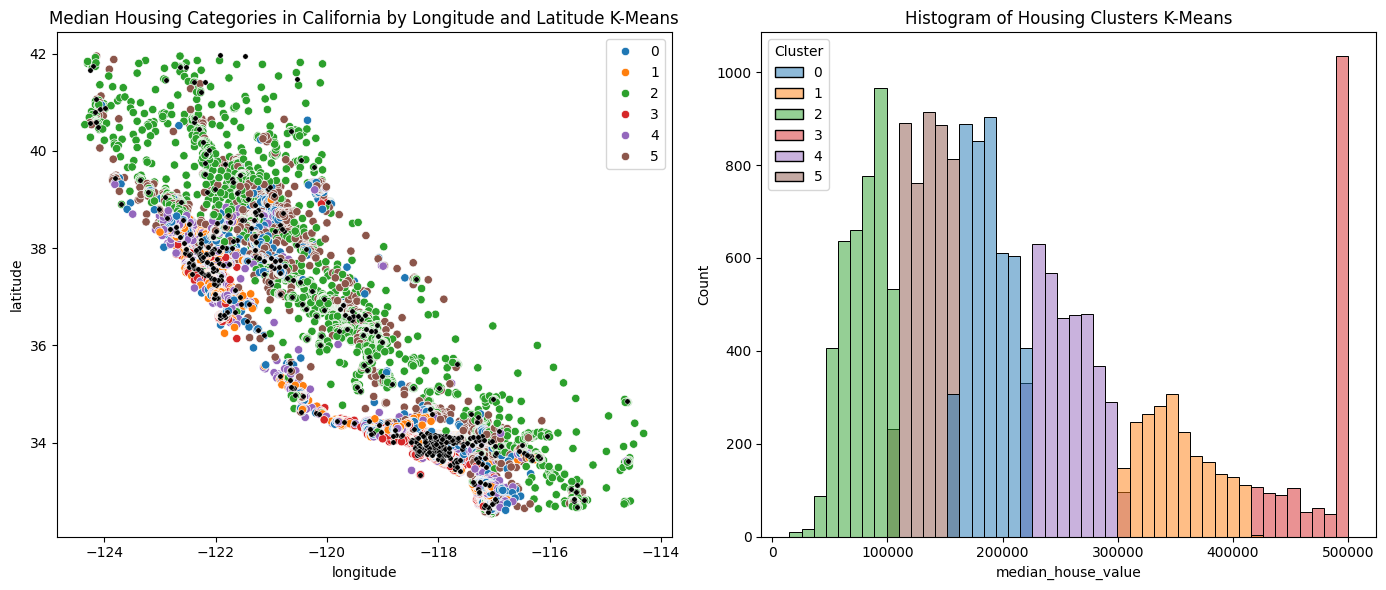

In [50]:
clusters = 6 #what im changing between iterations

value_clusters = KMeans(n_clusters=clusters).fit(cal_housing[["median_house_value"]])

X = cal_housing[["latitude", "longitude", "median_house_value"]]

X["Cluster"] = value_clusters.labels_

X["Cluster"] = X["Cluster"].astype("category")

plt.figure(figsize= (14,6))
plt.subplot(1,2,1)
sns.scatterplot(data = X, x = "longitude", y = "latitude", hue = "Cluster", color = k_color)
plt.title('Median Housing Categories in California by Longitude and Latitude K-Means')

sns.scatterplot(data = cities, x = "Longitude", y = "Latitude", color = 'black', s = 15, legend = "auto")

plt.subplot(1,2,2)
sns.histplot(data = X, x = "median_house_value", hue = "Cluster")
plt.title("Histogram of Housing Clusters K-Means")

plt.tight_layout()

**Your response**: After messing around with the code from above and just changing the clusters argument, it looks like 4 only does a good job at getting the coastal cities and some of the central valley but it doesn't cover the cities running along the middle of california (they're not real cities anyways). After further review I would like to say that we should defintiely not go above 8, it just adds too many colors to represent the same information as 6. I would say six does a reasonably good job at describing town/city locations without adding too much visiual clutter that just distracts us from our original goal. 

## Part 3. Visualizing Cost of Housing index across California

#### Question 3.1

Finally, lets use K-Means to identify regions in california in which housing value and median income are most out of proportion. First, create a new variable in `cal_housing` called `inc_housing_ratio` by dividing `median_income` by `median_housing_value`. Ensure that `median_income` is on the same scale as housing value (median income is reported in 10s of thousands). 

In [51]:
cal_housing["inc_housing_ratio"] = cal_housing['median_income']*10000/cal_housing['median_house_value']
cal_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,value_category,inc_housing_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0.183942
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0.231559
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0.206118
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0.165341
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0.112396
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,3,0.199782
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3,0.331621
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,3,0.184182
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,3,0.220449


In [52]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 3.2 

A very important consideration in K-Means clustering is the scale of your features. Features that have a scale orders of magnitude larger than other features will dominate the fitting algorithm and therefore the clusters. 

Use K-Means to create as many clusters as you deem fit using `latitude`, `longitude` and `inc_housing_ratio`. This will create clusters that don't just represent similar income to housing cost ratio, but also represent geographic regions. Then plot latitude and longitude in the same manner above, again changing hue by cluster. 

In [59]:
value_clusters = KMeans(n_clusters= 4).fit(cal_housing[["latitude", "longitude", "inc_housing_ratio"]])

X = cal_housing[["latitude", "longitude", "inc_housing_ratio"]]

X["Cluster"] = value_clusters.labels_
X["Cluster"] = X["Cluster"].astype("category")

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\2610763626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = value_clusters.labels_
C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\2610763626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


<Axes: xlabel='longitude', ylabel='latitude'>

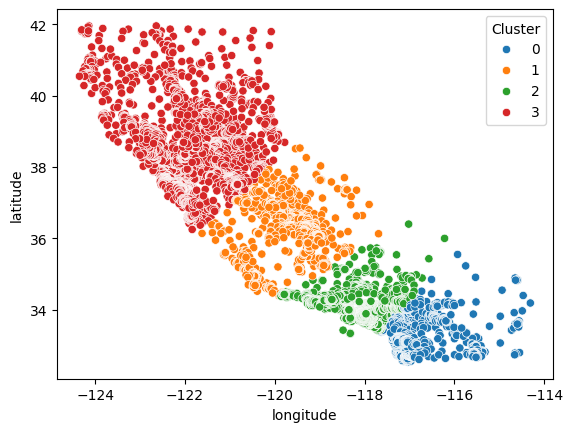

In [55]:
sns.scatterplot(data = X, y = 'latitude', x = 'longitude', hue = 'Cluster')

#### Question 3.3

What do you notice about the cluster's distribution? Do your clusters seem biased to a subset of features in the model, and why do you think this might be?

**Your response**: Well the clusters are now just segmented by latitude and longitude. It kind of says why above but the latitude and longitude are miles above the inc_housing_ratio such that the inc housing ratio isn't used for any part of the k-means clustering. 

#### Question 3.4

Create a standardized version of your input features, then fit and predict your model on these standardized features. Use 6 clusters. 

In [60]:
from sklearn.preprocessing import StandardScaler

X = cal_housing[["latitude", "longitude", "inc_housing_ratio"]]
scaler = StandardScaler()

X_stand = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_stand, columns = X.columns)
X_scaled.head()

,latitude,longitude,inc_housing_ratio
0,1.052548,-1.327835,-0.323701
1,1.043185,-1.322844,0.191818
2,1.038503,-1.332827,-0.083620
3,1.038503,-1.337818,-0.525073
4,1.038503,-1.337818,-1.098269


In [62]:
value_clusters = KMeans(n_clusters=6).fit(X_scaled)

X["Cluster"] = value_clusters.labels_

X["Cluster"] = X["Cluster"].astype("category")

X

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\3964910518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = value_clusters.labels_
C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_36776\3964910518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


,latitude,longitude,inc_housing_ratio,Cluster
0,37.88,-122.23,0.183942,1
1,37.86,-122.22,0.231559,1
2,37.85,-122.24,0.206118,1
3,37.85,-122.25,0.165341,1
4,37.85,-122.25,0.112396,1
...,...,...,...,...
20635,39.48,-121.09,0.199782,1
20636,39.49,-121.21,0.331621,4
20637,39.43,-121.22,0.184182,1
20638,39.43,-121.32,0.220449,4


#### Question 3.5

Identify which cluster levels are associated with different income to housing ratios, and re-order your cluster values in order from lower to highest ratio (the `replace` method might be helpful here). 

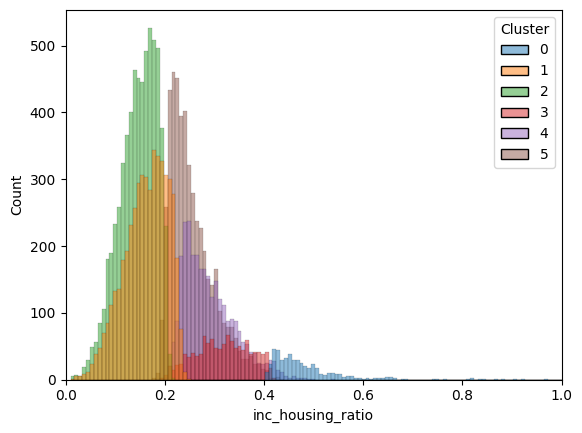

In [67]:
sns.histplot(data = X, x = 'inc_housing_ratio', hue = "Cluster", alpha = .5)
plt.xlim(0,1)
X["Cluster"] = X["Cluster"]
X = X.sort_values(by = "Cluster")

#2 -> 0, 1 -> 1, 5-> 2, 4 - > 3, 3 -> 4, 0 -> 6
X["Cluster"] = X['Cluster'].replace({0:5, 1:1, 2:0, 3:4, 4:3,5:2})

#### Question 3.6

Finally, plot latitude vs longitude, adjusting the hue of the points based on your newly ordered clusters. This time be sure to use a quantitative sequential color palette.

In [86]:
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.85)

<Axes: xlabel='longitude', ylabel='latitude'>

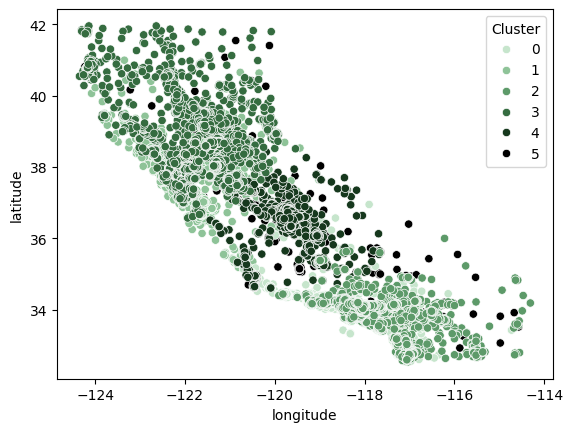

In [87]:
sns.scatterplot(data = X, y = 'latitude', x = 'longitude', hue = 'Cluster', palette = cmap)

Which geographic regions of California have the worst housing to income ratios?

**Your response**: It looks like the Bay has the worst housing to income ratios. It also seems like generally as you move farther south things kept progressing to have a worse income to housing ratios. The best value area seems to be the middle of california. I wonder why the bay seems to have lower values I know the properties are more expensive, but it seems unusual for it to be this low.

Congratulations! You are finished with this assignment.

To double-check your work, the cell below will rerun all of the autograder tests.

In [88]:
grader.check_all()

q1_3 results: All test cases passed!

q3_1 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following commands in the File menu:

* Save and Checkpoint
* Close and Halt

Then submit your notebook for Canvas Assignment HW8.